# Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'2.2.2'

## Series

![](https://pandas.pydata.org/docs/_images/01_table_series.svg)

### Создание

* из списка

In [4]:
salaries = pd.Series([400, 300, 200, 250, 100]) 
salaries

0    400
1    300
2    200
3    250
4    100
dtype: int64

In [5]:
salaries = pd.Series(data=[400, 300, 200, 250, 100], 
                     index=['Max', 'Ann', 'Charles', 'John', 'Mike']) 
salaries                                                               

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [6]:
salaries.index

Index(['Max', 'Ann', 'Charles', 'John', 'Mike'], dtype='object')

In [7]:
salaries.values

array([400, 300, 200, 250, 100], dtype=int64)

In [9]:
salaries.index[1] = 'John'

TypeError: Index does not support mutable operations

* из numpy-массива

In [10]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.303081
b   -0.079500
c   -0.960220
d   -0.443684
e   -1.107978
dtype: float64

* из словаря

In [11]:
d = {'b': 1, 'a': 0, 'c': 2}

In [12]:
s = pd.Series(d)
s

b    1
a    0
c    2
dtype: int64

* из скалярного значения

In [13]:
s =  pd.Series(5, index=['a', 'b', 'c', 'd', 'e'])
s

a    5
b    5
c    5
d    5
e    5
dtype: int64

### Доступ к элементам и операции над ними

In [14]:
salaries

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [16]:
salaries[0]

C:\Users\artem\AppData\Local\Temp\ipykernel_38364\352631343.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  salaries[0]


400

In [17]:
salaries[3]

C:\Users\artem\AppData\Local\Temp\ipykernel_38364\140240883.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  salaries[3]


250

In [19]:
salaries['Max']

400

In [20]:
salaries['John']

250

In [23]:
salaries[2:]

Charles    200
John       250
Mike       100
dtype: int64

In [25]:
salaries[2:].to_numpy()

array([200, 250, 100], dtype=int64)

In [24]:
salaries[2:].values

array([200, 250, 100], dtype=int64)

In [26]:
salaries

Max        400
Ann        300
Charles    200
John       250
Mike       100
dtype: int64

In [27]:
salaries['Ann'] = 350

In [28]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [30]:
salaries[['Max', 'John']]

Max     400
John    250
dtype: int64

In [31]:
salaries['Ivan']

KeyError: 'Ivan'

In [32]:
val = salaries.get('Ivan')
val

In [33]:
val is None

True

In [36]:
val = salaries.get('Ivan', default='undefined')
val

'undefined'

### Атрибуты 

* тип данных

In [37]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [38]:
salaries.dtype

dtype('int64')

In [45]:
salaries.astype('int32')

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int32

In [46]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int64

In [47]:
salaries = salaries.astype('int32')
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
dtype: int32

* имя

In [48]:
pd.DataFrame(salaries)

,0
Max,400
Ann,350
Charles,200
John,250
Mike,100


In [49]:
salaries.name = 'salaries'

In [50]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
Name: salaries, dtype: int32

In [51]:
pd.DataFrame(salaries)

,salaries
Max,400
Ann,350
Charles,200
John,250
Mike,100


* размер

In [52]:
salaries.shape

(5,)

In [53]:
len(salaries)

5

### проверка на пропущенные значения

Starting from pandas 1.0, an experimental pd.NA value (singleton) is available to represent scalar missing values. 

At this moment, it is used in the nullable integer, boolean and dedicated string data types as the missing value indicator.

The goal of pd.NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type).

![](https://xkcd.ru/i/927_v4.png)

In [54]:
pd.NA, np.nan, float('nan')

(<NA>, nan, nan)

In [55]:
np.nan == np.nan

False

In [56]:
np.nan > 3, np.nan < 3, np.nan == 3

(False, False, False)

In [57]:
np.isnan(np.nan), np.isnan(pd.NA)

(True, <NA>)

In [58]:
np.isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [59]:
pd.isna(None), pd.isna(np.nan), pd.isna(pd.NA)

(True, True, True)

In [60]:
pd.isnull(None), pd.isnull(np.nan), pd.isnull(pd.NA)

(True, True, True)

In [61]:
salaries

Max        400
Ann        350
Charles    200
John       250
Mike       100
Name: salaries, dtype: int32

In [62]:
salaries['Ivan'] = None

In [63]:
salaries

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Ivan         NaN
Name: salaries, dtype: float64

In [64]:
salaries.isna()

Max        False
Ann        False
Charles    False
John       False
Mike       False
Ivan        True
Name: salaries, dtype: bool

In [65]:
mask = salaries.isna()
salaries[mask]

Ivan   NaN
Name: salaries, dtype: float64

In [66]:
salaries[salaries.isna()]

Ivan   NaN
Name: salaries, dtype: float64

In [67]:
salaries

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Ivan         NaN
Name: salaries, dtype: float64

In [68]:
salaries.index

Index(['Max', 'Ann', 'Charles', 'John', 'Mike', 'Ivan'], dtype='object')

In [69]:
salaries[['Max', 'Ann', 'Ivan', 'Charles', 'John', 'Mike']]

Max        400.0
Ann        350.0
Ivan         NaN
Charles    200.0
John       250.0
Mike       100.0
Name: salaries, dtype: float64

### Операции

In [70]:
salaries.drop('Ivan')

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Name: salaries, dtype: float64

In [71]:
salaries

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Ivan         NaN
Name: salaries, dtype: float64

In [72]:
salaries.drop('Ivan', inplace=True)

In [73]:
salaries

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Name: salaries, dtype: float64

In [74]:
salaries.mean()

260.0

In [75]:
salaries.median()

250.0

In [76]:
np.std(salaries)

106.7707825203131

In [77]:
salaries > 200

Max         True
Ann         True
Charles    False
John        True
Mike       False
Name: salaries, dtype: bool

In [78]:
salaries[salaries > 200]

Max     400.0
Ann     350.0
John    250.0
Name: salaries, dtype: float64

In [79]:
(salaries > 200) & (salaries < 400)

Max        False
Ann         True
Charles    False
John        True
Mike       False
Name: salaries, dtype: bool

In [83]:
salaries[(salaries > 200) & (salaries < 400) | (salaries < 500)]

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Name: salaries, dtype: float64

### Почему индексы важны?

In [85]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [86]:
A

0    2
1    4
2    6
dtype: int64

In [87]:
B

1    1
2    3
3    5
dtype: int64

In [88]:
A + B  # откуда NaN?

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [89]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

###  Задача 1

In [90]:
x = pd.Series(np.random.random((100)))
y = pd.Series(np.random.randint(0, 10, (100)))

In [91]:
x

0     0.271451
1     0.113724
2     0.716461
3     0.633387
4     0.149463
        ...   
95    0.729053
96    0.080727
97    0.040994
98    0.318287
99    0.001751
Length: 100, dtype: float64

In [92]:
y

0     5
1     4
2     1
3     8
4     9
     ..
95    4
96    1
97    2
98    1
99    2
Length: 100, dtype: int32

In [93]:
np.linalg.inv(x.T.dot(x))

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

## DataFrame

![](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

### Создание

* явное указание параметров

In [94]:
df = pd.DataFrame(data=np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


* из словаря

In [95]:
d = {'A': np.random.random(5), 
     'B': [1,2,3,4,5], 
     'C': np.arange(5) > 2}
df2 = pd.DataFrame(d)
df2

,A,B,C
0,0.803329,1,False
1,0.950228,2,False
2,0.852233,3,False
3,0.054132,4,True
4,0.450463,5,True


* из списка словарей

In [96]:
df3 = pd.DataFrame([{'A': 1, 'B': 2}, {'A': 2, 'C': 3}])
df3

,A,B,C
0,1,2.0,NaN
1,2,NaN,3.0


In [97]:
df3 = pd.DataFrame([{'A': 1, 'B': 2}, {'A': 2, 'C': 3, 'D':10}])
df3

,A,B,C,D
0,1,2.0,NaN,NaN
1,2,NaN,3.0,10.0


* из Series

In [98]:
salaries

Max        400.0
Ann        350.0
Charles    200.0
John       250.0
Mike       100.0
Name: salaries, dtype: float64

In [99]:
df4 = pd.DataFrame(salaries)
df4

,salaries
Max,400.0
Ann,350.0
Charles,200.0
John,250.0
Mike,100.0


### Доступ к элементам

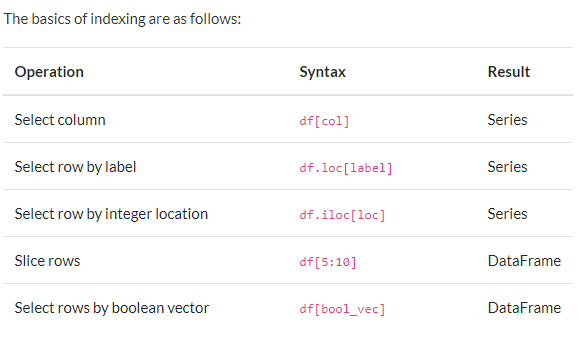

In [100]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [101]:
df['f2']

o1   -0.119684
o2    1.503111
o3   -0.551656
o4   -0.250865
o5   -0.798129
Name: f2, dtype: float64

In [102]:
df['o2']

KeyError: 'o2'

In [103]:
df[['f2', 'f3']]

,f2,f3
o1,-0.119684,0.902429
o2,1.503111,1.858986
o3,-0.551656,0.610080
o4,-0.250865,-0.175995
o5,-0.798129,-1.144172


In [104]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [105]:
df[0]

KeyError: 0

In [106]:
df[1:4]

,f1,f2,f3
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995


In [107]:
df[1:]

,f1,f2,f3
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [108]:
df.loc['o2']

f1   -1.579116
f2    1.503111
f3    1.858986
Name: o2, dtype: float64

In [109]:
df.loc[['o2', 'o3']]

,f1,f2,f3
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080


In [110]:
df.loc[['o2', 'o3'],'f2']

o2    1.503111
o3   -0.551656
Name: f2, dtype: float64

In [111]:
df.loc[['o2', 'o3'],['f2', 'f3']]

,f2,f3
o2,1.503111,1.858986
o3,-0.551656,0.610080


In [112]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [113]:
df.iloc[1, 1:]

f2    1.503111
f3    1.858986
Name: o2, dtype: float64

In [114]:
df.iloc[1:3, 1:]

,f2,f3
o2,1.503111,1.858986
o3,-0.551656,0.610080


In [116]:
for i in range(len(df)):
    obj = df.iloc[i]
    print(obj)

f1    1.619401
f2   -0.119684
f3    0.902429
Name: o1, dtype: float64
f1   -1.579116
f2    1.503111
f3    1.858986
Name: o2, dtype: float64
f1   -0.960834
f2   -0.551656
f3    0.610080
Name: o3, dtype: float64
f1    1.167558
f2   -0.250865
f3   -0.175995
Name: o4, dtype: float64
f1   -1.249887
f2   -0.798129
f3   -1.144172
Name: o5, dtype: float64


## Операции

In [117]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [118]:
df.mean()

f1   -0.200576
f2   -0.043444
f3    0.410266
dtype: float64

In [119]:
df.mean(axis=1)

o1    0.800715
o2    0.594327
o3   -0.300803
o4    0.246899
o5   -1.064063
dtype: float64

In [120]:
df.median(axis=0)

f1   -0.960834
f2   -0.250865
f3    0.610080
dtype: float64

In [123]:
np.std(df, axis=1)

o1    0.713612
o2    1.543708
o3    0.665401
o4    0.651721
o5    0.192932
dtype: float64

In [124]:
np.linalg.norm(df)

4.269089382440589

In [126]:
df - df

,f1,f2,f3
o1,0.0,0.0,0.0
o2,0.0,0.0,0.0
o3,0.0,0.0,0.0
o4,0.0,0.0,0.0
o5,0.0,0.0,0.0


### Задача 1

In [127]:
x = pd.DataFrame(np.random.random((1000, 100)))
y = pd.Series(np.random.randint(0, 10, (1000)))

In [128]:
x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.411502,0.940465,0.055696,0.055612,0.372654,0.172029,0.436118,0.734291,0.075805,0.466666,...,0.052118,0.869879,0.937653,0.187222,0.302427,0.443628,0.892384,0.371604,0.011218,0.280883
1,0.004828,0.912594,0.640271,0.014760,0.603603,0.721436,0.158350,0.724876,0.190120,0.663354,...,0.646771,0.940027,0.419832,0.922114,0.546679,0.144903,0.254073,0.142842,0.449872,0.002383
2,0.817962,0.837969,0.678643,0.770578,0.139738,0.809072,0.169299,0.402127,0.150873,0.196402,...,0.877030,0.942540,0.396073,0.173802,0.748321,0.242227,0.021310,0.977526,0.529270,0.127650
3,0.034537,0.809006,0.198723,0.721627,0.175622,0.710891,0.315073,0.568768,0.033206,0.177821,...,0.105508,0.179161,0.375637,0.497560,0.004793,0.473651,0.454103,0.606333,0.430428,0.624955
4,0.234662,0.036317,0.900750,0.409919,0.552242,0.607573,0.535350,0.401374,0.236890,0.292941,...,0.065776,0.644271,0.049794,0.312913,0.163461,0.674950,0.455197,0.667730,0.589488,0.273113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.237945,0.564612,0.410829,0.599130,0.577947,0.793752,0.861622,0.946377,0.336264,0.671236,...,0.831980,0.947543,0.287759,0.834091,0.641114,0.020461,0.270466,0.172884,0.402679,0.951318
996,0.486676,0.534208,0.716973,0.172036,0.262438,0.650198,0.852134,0.754780,0.436028,0.280312,...,0.546913,0.260624,0.456812,0.048000,0.306328,0.603295,0.811780,0.319791,0.523924,0.924913
997,0.129926,0.299781,0.345335,0.484804,0.283947,0.348542,0.240814,0.329759,0.696384,0.893951,...,0.296429,0.278130,0.778234,0.961340,0.135583,0.890680,0.726996,0.833653,0.876331,0.698503
998,0.570026,0.429634,0.328046,0.529184,0.342926,0.598107,0.581058,0.200762,0.360844,0.962378,...,0.059144,0.398272,0.916168,0.288695,0.307952,0.072878,0.887151,0.738113,0.680559,0.381816


In [129]:
np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

array([ 0.02646927,  0.34487187,  0.42649212,  0.37796331, -0.26221552,
        0.12333834,  0.65504034, -0.12356506, -0.07621123,  0.33580913,
        0.42146354, -0.11789061,  0.16211243, -0.10369706, -0.46139154,
        0.3769358 ,  0.09118839, -0.07876596, -0.5293637 , -0.08138002,
       -0.13593239,  0.61641757,  0.00541432,  0.14565141, -0.49670159,
       -0.13752447,  0.37008183, -0.21061038,  0.03057832,  0.01361924,
        0.19422603, -0.10410724,  0.16857417, -0.08356295,  0.53127809,
        0.78695001,  0.23733034,  0.06177021,  0.03217495,  0.18322063,
       -0.15599325,  0.55675526,  0.07767493,  0.12776865,  0.02494312,
        0.42508609, -0.2904914 , -0.4924856 , -0.49222439, -0.55379489,
        0.13053065, -0.08560128,  0.02421586,  0.1211024 , -0.80391086,
        0.43461374,  0.05246617, -0.05742848,  0.06226984, -0.03710004,
        0.67239697,  0.03586075, -0.09507609, -0.03501759, -0.27661369,
        0.03796348,  0.06228973, -0.12567996,  0.17887359,  0.10

### Изменение, удаление, вставка новых значений

In [131]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,-0.551656,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [132]:
df.loc['o3', 'f2']

-0.5516555864678117

In [133]:
df.loc['o3', 'f2'] = 100

In [134]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,-1.579116,1.503111,1.858986
o3,-0.960834,100.000000,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [135]:
df.loc['o2'] = [1, 2, 3]

In [136]:
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,1.000000,2.000000,3.000000
o3,-0.960834,100.000000,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172


In [137]:
df.loc['o6'] = [4, 5, 6]
df

,f1,f2,f3
o1,1.619401,-0.119684,0.902429
o2,1.000000,2.000000,3.000000
o3,-0.960834,100.000000,0.610080
o4,1.167558,-0.250865,-0.175995
o5,-1.249887,-0.798129,-1.144172
o6,4.000000,5.000000,6.000000


In [138]:
df['f4'] = 0

In [139]:
df

,f1,f2,f3,f4
o1,1.619401,-0.119684,0.902429,0
o2,1.000000,2.000000,3.000000,0
o3,-0.960834,100.000000,0.610080,0
o4,1.167558,-0.250865,-0.175995,0
o5,-1.249887,-0.798129,-1.144172,0
o6,4.000000,5.000000,6.000000,0


In [140]:
df['f1'] * df['f2']

o1    -0.193816
o2     2.000000
o3   -96.083381
o4    -0.292899
o5     0.997571
o6    20.000000
dtype: float64

In [141]:
df['f4'] = df['f1'] * df['f2']
df

,f1,f2,f3,f4
o1,1.619401,-0.119684,0.902429,-0.193816
o2,1.000000,2.000000,3.000000,2.000000
o3,-0.960834,100.000000,0.610080,-96.083381
o4,1.167558,-0.250865,-0.175995,-0.292899
o5,-1.249887,-0.798129,-1.144172,0.997571
o6,4.000000,5.000000,6.000000,20.000000


In [142]:
df.drop('f2', axis=1)

,f1,f3,f4
o1,1.619401,0.902429,-0.193816
o2,1.000000,3.000000,2.000000
o3,-0.960834,0.610080,-96.083381
o4,1.167558,-0.175995,-0.292899
o5,-1.249887,-1.144172,0.997571
o6,4.000000,6.000000,20.000000


In [143]:
df.drop(['f2', 'f1'], axis=1)

,f3,f4
o1,0.902429,-0.193816
o2,3.000000,2.000000
o3,0.610080,-96.083381
o4,-0.175995,-0.292899
o5,-1.144172,0.997571
o6,6.000000,20.000000


In [144]:
df

,f1,f2,f3,f4
o1,1.619401,-0.119684,0.902429,-0.193816
o2,1.000000,2.000000,3.000000,2.000000
o3,-0.960834,100.000000,0.610080,-96.083381
o4,1.167558,-0.250865,-0.175995,-0.292899
o5,-1.249887,-0.798129,-1.144172,0.997571
o6,4.000000,5.000000,6.000000,20.000000


In [145]:
df = df.drop('f2', axis=1)

In [146]:
df

,f1,f3,f4
o1,1.619401,0.902429,-0.193816
o2,1.000000,3.000000,2.000000
o3,-0.960834,0.610080,-96.083381
o4,1.167558,-0.175995,-0.292899
o5,-1.249887,-1.144172,0.997571
o6,4.000000,6.000000,20.000000


In [147]:
df.drop('f4', axis=1, inplace=True)

In [148]:
df

,f1,f3
o1,1.619401,0.902429
o2,1.000000,3.000000
o3,-0.960834,0.610080
o4,1.167558,-0.175995
o5,-1.249887,-1.144172
o6,4.000000,6.000000


### Объединение датафреймов

In [150]:
df

,f1,f3
o1,1.619401,0.902429
o2,1.000000,3.000000
o3,-0.960834,0.610080
o4,1.167558,-0.175995
o5,-1.249887,-1.144172
o6,4.000000,6.000000


In [151]:
df2.columns = ['f1', 'f2', 'f3']
df2

,f1,f2,f3
0,0.803329,1,False
1,0.950228,2,False
2,0.852233,3,False
3,0.054132,4,True
4,0.450463,5,True


In [152]:
df3 = df.append(df2)
df3

AttributeError: 'DataFrame' object has no attribute 'append'

In [153]:
df3 = pd.concat([df, df2], axis=0)
df3

,f1,f3,f2
o1,1.619401,0.902429,NaN
o2,1.000000,3.000000,NaN
o3,-0.960834,0.610080,NaN
o4,1.167558,-0.175995,NaN
o5,-1.249887,-1.144172,NaN
o6,4.000000,6.000000,NaN
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,0.054132,1.000000,4.0


In [154]:
pd.concat([df, df2], axis=1)

,f1,f3,f1,f2,f3
o1,1.619401,0.902429,NaN,NaN,NaN
o2,1.000000,3.000000,NaN,NaN,NaN
o3,-0.960834,0.610080,NaN,NaN,NaN
o4,1.167558,-0.175995,NaN,NaN,NaN
o5,-1.249887,-1.144172,NaN,NaN,NaN
o6,4.000000,6.000000,NaN,NaN,NaN
0,NaN,NaN,0.803329,1.0,False
1,NaN,NaN,0.950228,2.0,False
2,NaN,NaN,0.852233,3.0,False
3,NaN,NaN,0.054132,4.0,True


In [158]:
df4 = df.copy()

In [159]:
df4

,f1,f3
o1,1.619401,0.902429
o2,1.000000,3.000000
o3,-0.960834,0.610080
o4,1.167558,-0.175995
o5,-1.249887,-1.144172
o6,4.000000,6.000000


In [160]:
df4['f4'] = df4['f3']**2
df4

,f1,f3,f4
o1,1.619401,0.902429,0.814378
o2,1.000000,3.000000,9.000000
o3,-0.960834,0.610080,0.372198
o4,1.167558,-0.175995,0.030974
o5,-1.249887,-1.144172,1.309130
o6,4.000000,6.000000,36.000000


In [161]:
df4 = df4 + 10
df4

,f1,f3,f4
o1,11.619401,10.902429,10.814378
o2,11.000000,13.000000,19.000000
o3,9.039166,10.610080,10.372198
o4,11.167558,9.824005,10.030974
o5,8.750113,8.855828,11.309130
o6,14.000000,16.000000,46.000000


In [162]:
df

,f1,f3
o1,1.619401,0.902429
o2,1.000000,3.000000
o3,-0.960834,0.610080
o4,1.167558,-0.175995
o5,-1.249887,-1.144172
o6,4.000000,6.000000


In [164]:
df.join(df4['f4'])

,f1,f3,f4
o1,1.619401,0.902429,10.814378
o2,1.000000,3.000000,19.000000
o3,-0.960834,0.610080,10.372198
o4,1.167558,-0.175995,10.030974
o5,-1.249887,-1.144172,11.309130
o6,4.000000,6.000000,46.000000


In [165]:
df.join(df4, rsuffix='_new')

,f1,f3,f1_new,f3_new,f4
o1,1.619401,0.902429,11.619401,10.902429,10.814378
o2,1.000000,3.000000,11.000000,13.000000,19.000000
o3,-0.960834,0.610080,9.039166,10.610080,10.372198
o4,1.167558,-0.175995,11.167558,9.824005,10.030974
o5,-1.249887,-1.144172,8.750113,8.855828,11.309130
o6,4.000000,6.000000,14.000000,16.000000,46.000000


#### Merge и Задача 3

In [166]:
d1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'John'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'Lead']})
d2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue', 'Alice'],
                    'hire_date': [2004, 2008, 2012, 2014, 2018]})

In [167]:
d1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,John,Lead


In [168]:
d2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014
4,Alice,2018


In [169]:
d1.merge(d2, on="employee", how="inner")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [170]:
d1.merge(d2, on="employee", how="outer")

,employee,group,hire_date
0,Alice,NaN,2018.0
1,Bob,Accounting,2008.0
2,Jake,Engineering,2012.0
3,John,Lead,NaN
4,Lisa,Engineering,2004.0
5,Sue,HR,2014.0


In [171]:
d1.merge(d2, on="employee", how="left")

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,2012.0
2,Lisa,Engineering,2004.0
3,Sue,HR,2014.0
4,John,Lead,NaN


In [172]:
d1.merge(d2, on="employee", how="right")

,employee,group,hire_date
0,Lisa,Engineering,2004
1,Bob,Accounting,2008
2,Jake,Engineering,2012
3,Sue,HR,2014
4,Alice,NaN,2018


Merge, join, concatenate:
https://pandas.pydata.org/docs/user_guide/merging.html

## Пропущенные значения

In [173]:
df3.loc['o4', 'f3'] = None
df3.loc[3, 'f1'] = None
# df3.loc['o3', 'f2'] = 7
df3

,f1,f3,f2
o1,1.619401,0.902429,NaN
o2,1.000000,3.000000,NaN
o3,-0.960834,0.610080,NaN
o4,1.167558,NaN,NaN
o5,-1.249887,-1.144172,NaN
o6,4.000000,6.000000,NaN
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,NaN,1.000000,4.0


In [174]:
df3.isna()

,f1,f3,f2
o1,False,False,True
o2,False,False,True
o3,False,False,True
o4,False,True,True
o5,False,False,True
o6,False,False,True
0,False,False,False
1,False,False,False
2,False,False,False
3,True,False,False


In [175]:
df3.dropna()

,f1,f3,f2
0,0.803329,0.0,1.0
1,0.950228,0.0,2.0
2,0.852233,0.0,3.0
4,0.450463,1.0,5.0


In [176]:
df3

,f1,f3,f2
o1,1.619401,0.902429,NaN
o2,1.000000,3.000000,NaN
o3,-0.960834,0.610080,NaN
o4,1.167558,NaN,NaN
o5,-1.249887,-1.144172,NaN
o6,4.000000,6.000000,NaN
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,NaN,1.000000,4.0


In [177]:
df3 = df3.dropna()
df3.dropna(inplace=True)

C:\Users\artem\AppData\Local\Temp\ipykernel_38364\3103944192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [178]:
df3

,f1,f3,f2
0,0.803329,0.0,1.0
1,0.950228,0.0,2.0
2,0.852233,0.0,3.0
4,0.450463,1.0,5.0


In [179]:
df3 = pd.concat([df, df2], axis=0)
df3

,f1,f3,f2
o1,1.619401,0.902429,NaN
o2,1.000000,3.000000,NaN
o3,-0.960834,0.610080,NaN
o4,1.167558,-0.175995,NaN
o5,-1.249887,-1.144172,NaN
o6,4.000000,6.000000,NaN
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,0.054132,1.000000,4.0


In [182]:
df3.mean()

f1    0.789693
f3    1.017486
f2    3.000000
dtype: float64

In [184]:
df3.fillna('Привет')

,f1,f3,f2
o1,1.619401,0.902429,Привет
o2,1.000000,3.000000,Привет
o3,-0.960834,0.610080,Привет
o4,1.167558,-0.175995,Привет
o5,-1.249887,-1.144172,Привет
o6,4.000000,6.000000,Привет
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,0.054132,1.000000,4.0


In [185]:
df3.fillna(df3.mean())

,f1,f3,f2
o1,1.619401,0.902429,3.0
o2,1.000000,3.000000,3.0
o3,-0.960834,0.610080,3.0
o4,1.167558,-0.175995,3.0
o5,-1.249887,-1.144172,3.0
o6,4.000000,6.000000,3.0
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,0.054132,1.000000,4.0


In [189]:
df3.fillna(method='bfill')

C:\Users\artem\AppData\Local\Temp\ipykernel_38364\3530771817.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3.fillna(method='bfill')


,f1,f3,f2
o1,1.619401,0.902429,1.0
o2,1.000000,3.000000,1.0
o3,-0.960834,0.610080,1.0
o4,1.167558,-0.175995,1.0
o5,-1.249887,-1.144172,1.0
o6,4.000000,6.000000,1.0
0,0.803329,0.000000,1.0
1,0.950228,0.000000,2.0
2,0.852233,0.000000,3.0
3,0.054132,1.000000,4.0


## Сохранение

In [192]:
df3.to_csv('dataframe.csv')

In [198]:
df.reset_index()

,index,f1,f3
0,o1,1.619401,0.902429
1,o2,1.000000,3.000000
2,o3,-0.960834,0.610080
3,o4,1.167558,-0.175995
4,o5,-1.249887,-1.144172
5,o6,4.000000,6.000000


In [199]:
df.reset_index(drop=True)

,f1,f3
0,1.619401,0.902429
1,1.000000,3.000000
2,-0.960834,0.610080
3,1.167558,-0.175995
4,-1.249887,-1.144172
5,4.000000,6.000000


# Первичный анализ

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [202]:
df.head(5)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [203]:
df.tail(3)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3
1259,1.92,24,0,0,0,1,0,1,16,3


In [204]:
df.sample(3)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
856,5.13,35,1,0,0,1,1,0,10,3
663,3.08,5,0,1,0,0,1,0,13,4
1180,4.28,7,1,1,0,1,1,1,12,3


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [206]:
print(df.shape)
print(df.index.values)

(1260, 10)
[   0    1    2 ... 1257 1258 1259]


In [207]:
df['wage'].to_numpy()

array([5.73, 4.28, 7.96, ..., 3.29, 2.31, 1.92])

In [210]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [213]:
df.educ

0       14
1       12
2       10
3       16
4       16
        ..
1255    12
1256    12
1257    12
1258    10
1259    16
Name: educ, Length: 1260, dtype: int64

In [214]:
df.educ.value_counts()

educ
12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: count, dtype: int64

In [215]:
df.sort_values(by='exper', ascending=True).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
878,2.63,0,1,1,0,1,1,0,10,2
620,2.88,0,0,1,0,1,0,1,12,2
959,2.40,0,1,0,0,0,0,0,8,2
811,1.27,0,0,1,0,1,0,0,10,4
488,2.43,1,0,1,0,1,0,0,10,4


In [216]:
df.sort_values(by=['female', 'wage'], ascending=[True, False])

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3
...,...,...,...,...,...,...,...,...,...,...
874,1.20,4,0,1,0,1,1,0,12,3
462,1.16,2,0,1,0,1,0,0,13,4
597,1.16,5,0,1,0,1,1,1,10,3
1226,1.09,8,0,1,0,1,1,1,10,2


Если сортируем по двум количественным признакам, то это имеет смысл, если есть повторения первого признака.

In [217]:
df.sort_values(by=['wage', 'exper'], ascending=[True, False])

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
597,1.16,5,0,1,0,1,1,1,10,3
462,1.16,2,0,1,0,1,0,0,13,4
...,...,...,...,...,...,...,...,...,...,...
290,31.09,32,0,0,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
415,38.86,29,0,1,0,0,1,0,13,3
269,41.67,16,0,0,0,0,1,0,13,4


In [218]:
df.sort_values(by=['wage', 'exper'], ascending=[True, False])[:10]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
1214,1.02,11,0,1,0,1,1,1,13,3
1009,1.05,29,0,1,1,0,1,0,5,3
1226,1.09,8,0,1,0,1,1,1,10,2
597,1.16,5,0,1,0,1,1,1,10,3
462,1.16,2,0,1,0,1,0,0,13,4
1138,1.17,1,0,1,1,0,0,0,12,2
845,1.20,5,0,1,0,1,1,0,12,3
874,1.20,4,0,1,0,1,1,0,12,3
1253,1.22,10,0,1,0,1,0,1,5,3
502,1.25,5,0,1,0,1,1,0,12,4


In [219]:
df['goodhlth']

0       1
1       1
2       1
3       1
4       1
       ..
1255    1
1256    1
1257    1
1258    1
1259    0
Name: goodhlth, Length: 1260, dtype: int64

In [220]:
df['goodhlth'].mean()

0.9333333333333333

In [221]:
df['wage'].mean()

6.306690476190475

In [222]:
df[df['female'] == 1]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [223]:
df[(df['goodhlth'] == 1) & (df['female'] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1254,1.79,20,0,1,0,1,1,1,8,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [224]:
df[(df['goodhlth'] == 1) & (df['female'] == 1)].median()

wage         3.75
exper       11.00
union        0.00
goodhlth     1.00
black        0.00
female       1.00
married      0.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [225]:
df[(df['goodhlth'] == 0) & (df['female'] == 1)].median()

wage         3.29
exper       20.00
union        0.00
goodhlth     0.00
black        0.00
female       1.00
married      1.00
service      0.00
educ        12.00
looks        3.00
dtype: float64

In [226]:
df[df['educ'] > 10]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
...,...,...,...,...,...,...,...,...,...,...
1252,9.62,21,1,1,0,0,1,0,16,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [227]:
df[(df['educ'] > 10) | (df['exper'] > 20)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1252,9.62,21,1,1,0,0,1,0,16,3
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3


In [228]:
df[(df['educ'] > 10) | (df['exper'] > 20)].sample(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
483,6.27,3,1,1,0,0,0,1,13,3
1012,8.44,15,1,1,0,0,1,0,12,4
612,9.36,16,0,1,0,0,0,0,12,3
202,5.06,5,0,1,0,0,1,1,17,3
709,6.12,23,0,1,0,0,1,0,12,4
509,7.69,25,0,1,0,0,1,0,12,3
1238,4.87,10,0,1,0,0,1,0,13,3
234,4.70,14,0,1,0,1,1,0,12,4
742,16.03,25,0,1,0,0,1,1,10,3
1105,3.70,11,0,1,0,0,1,0,12,3


## Группировка

In [234]:
df.groupby('female')

* зависимость зарплаты от пола

In [230]:
df.groupby('female')['wage'].mean()

female
0    7.368823
1    4.299358
Name: wage, dtype: float64

* зависимость зарплаты от пола и семейного статуса

In [231]:
df.groupby(['female', 'married'])['wage'].mean()

female  married
0       0          5.989578
        1          7.716778
1       0          4.298879
        1          4.299859
Name: wage, dtype: float64

In [232]:
df.groupby(['female', 'married'])['wage'].mean().unstack()

married,0,1
female,,
0,5.989578,7.716778
1,4.298879,4.299859


In [233]:
pvt = df.pivot_table(index=['female'], columns=['married'], values='wage', aggfunc='mean')
pvt

married,0,1
female,,
0,5.989578,7.716778
1,4.298879,4.299859


In [235]:
df.pivot_table(index=['female'], columns=['educ'], values='wage', aggfunc=lambda x: list(x))

educ,5,8,10,12,13,14,16,17
female,,,,,,,,
0,"[5.13, 7.69, 11.06, 3.0, 4.73, 7.21, 7.75, 7.2...","[6.41, 2.63, 10.42, 20.86, 4.09, 7.96, 6.81, 6...","[5.73, 6.73, 3.75, 11.81, 7.81, 1.32, 4.49, 1....","[6.87, 12.39, 2.82, 5.85, 5.99, 4.62, 7.46, 7....","[17.03, 10.05, 14.84, 9.62, 7.69, 7.79, 6.56, ...","[6.79, 5.96, 7.69, 5.24, 9.4, 9.62, 9.84, 7.86...","[11.57, 11.42, 8.76, 7.69, 4.03, 3.0, 7.99, 6....","[5.14, 5.16, 11.54, 7.69, 15.81, 19.08, 12.31,..."
1,"[4.81, 1.98, 1.92, 2.02, 6.25, 3.46, 3.37, 1.2...","[1.98, 4.1, 5.69, 2.52, 2.26, 1.98, 1.98, 1.98...","[7.96, 10.12, 3.75, 2.11, 3.29, 2.43, 3.85, 6....","[4.28, 3.91, 3.89, 3.45, 4.62, 6.11, 2.63, 5.7...","[5.73, 6.73, 3.37, 4.99, 3.63, 2.81, 3.76, 2.8...","[5.73, 4.95, 5.05, 4.35, 4.53, 6.54, 2.0, 5.03...","[5.0, 7.69, 8.36, 8.79, 6.55, 7.96, 4.62, 5.66...","[10.44, 9.16, 6.91, 4.77, 7.14, 7.79, 9.32, 8...."


In [236]:
df.pivot_table(index=['female'], columns=['educ'], values='wage', aggfunc=lambda x: np.linalg.norm(x))

educ,5,8,10,12,13,14,16,17
female,,,,,,,,
0,31.627785,37.946931,81.211330,135.179710,116.916371,36.636614,94.081339,104.540581
1,11.348141,11.163745,26.898939,51.467911,88.029318,23.940033,32.638225,48.464774


### Задача 2

In [237]:
titanic = pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv', sep=';')

In [238]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [240]:
titanic[titanic["Fare"] > titanic["Fare"].median()].groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex    
1       female     0.968085
        male       0.387931
2       female     0.936170
        male       0.204545
        unknown    1.000000
3       female     0.403226
        male       0.192308
        unknown    0.000000
Name: Survived, dtype: float64

## Построение графиков

<Axes: >

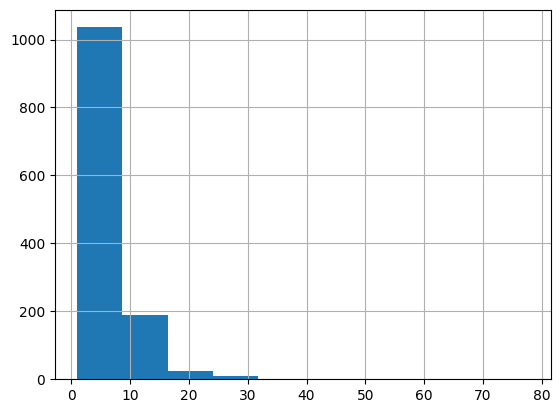

In [241]:
df['wage'].hist()

<Axes: xlabel='female'>

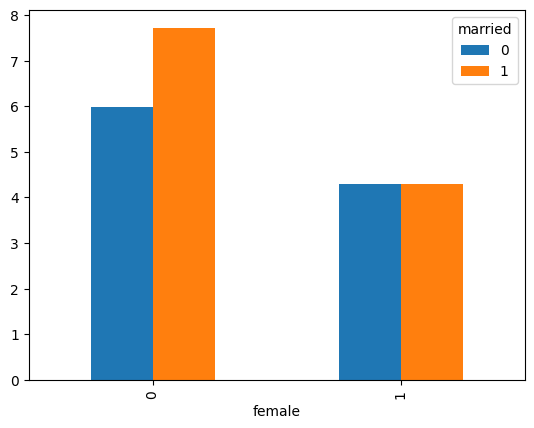

In [242]:
pvt.plot.bar()

## Применение функций

In [243]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


* Apply

In [244]:
df.apply(np.max)

wage        77.72
exper       48.00
union        1.00
goodhlth     1.00
black        1.00
female       1.00
married      1.00
service      1.00
educ        17.00
looks        5.00
dtype: float64

In [245]:
df.apply(lambda x: x.max() - x.min())

wage        76.7
exper       48.0
union        1.0
goodhlth     1.0
black        1.0
female       1.0
married      1.0
service      1.0
educ        12.0
looks        4.0
dtype: float64

In [246]:
df['female']

0       1
1       1
2       1
3       0
4       0
       ..
1255    1
1256    1
1257    1
1258    1
1259    1
Name: female, Length: 1260, dtype: int64

In [247]:
df['female'].apply(lambda x: 'Male' if x == 0 else 'Female')

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object

In [248]:
df['female']

0       1
1       1
2       1
3       0
4       0
       ..
1255    1
1256    1
1257    1
1258    1
1259    1
Name: female, Length: 1260, dtype: int64

In [249]:
df['female'] = df['female'].apply(lambda x: 'Male' if x == 0 else 'Female')

In [250]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,Female,1,1,14,4
1,4.28,28,0,1,0,Female,1,0,12,3
2,7.96,35,0,1,0,Female,0,0,10,4
3,11.57,38,0,1,0,Male,1,1,16,3
4,11.42,27,0,1,0,Male,1,0,16,3


* Map

In [251]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [252]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [253]:
d = {0:'Male', 1:'Female'}
df['female'].map(d)

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object

In [254]:
df['female'].map(lambda x: 'Male' if x == 0 else 'Female')

0       Female
1       Female
2       Female
3         Male
4         Male
         ...  
1255    Female
1256    Female
1257    Female
1258    Female
1259    Female
Name: female, Length: 1260, dtype: object